<a href="https://colab.research.google.com/github/samdvies/pyTorchDeepLearnIntro/blob/main/07_ML_kNN_sd2323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 [60 marks]

In the previous exercise, we utilised the Euclidean distance measure to calculate the distances between test samples and their neighbors. Now, let's explore the impact of alternative distance measures, specifically Minkowski (with a 'p' value of 3) and Manhattan distances, on our results. In your report, follow these steps:

1. **Code Implementation**: Implement the necessary code to compute Minkowski and Manhattan distances.

2. **Consistent 'k' Values**: Keep the same 'k' values used in the previous code to to get the accuracy results of the distance measures used.

3. **Accuracy Table**: Create a table that showcases the accuracy results for each distance measure and 'k' value.

4. **Discussion**: Provide a thoughtful discussion of your findings, including any differences observed in the results and their potential implications.



k     | Euclidean    | Manhattan    | Minkowski (p=3)
-------------------------------------------------------
1     | 0.93         | 0.93         | 0.93           
3     | 0.97         | 0.97         | 0.93           
5     | 0.97         | 0.97         | 0.93           
7     | 0.97         | 0.97         | 0.97           
9     | 0.97         | 0.97         | 0.97           
11    | 0.97         | 0.97         | 1.00           
13    | 1.00         | 0.97         | 1.00           
15    | 1.00         | 0.97         | 1.00           
17    | 0.97         | 1.00         | 0.97           
19    | 0.97         | 1.00         | 0.97           
21    | 0.97         | 1.00         | 0.97           
23    | 0.97         | 0.97         | 0.97           
25    | 0.97         | 0.97         | 0.97           
27    | 0.97         | 0.97         | 0.97           
29    | 0.97         | 0.93         | 0.97           


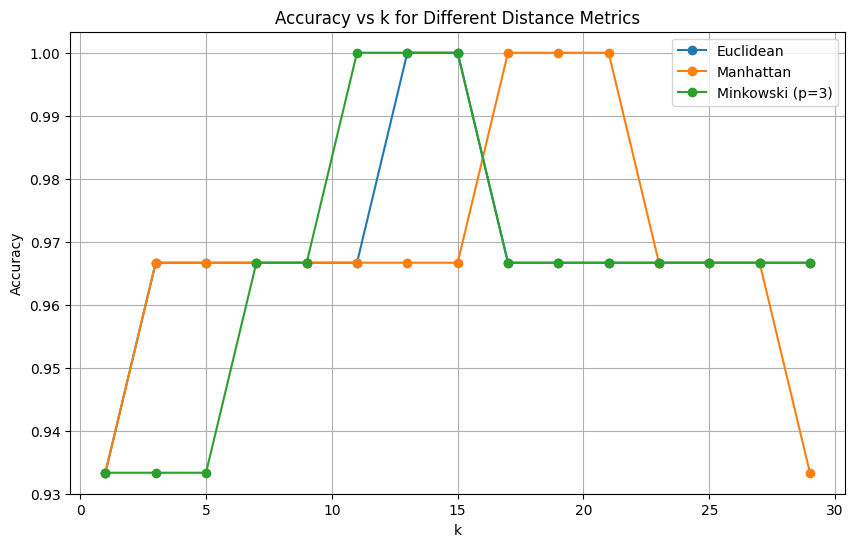

In [12]:


# 1. Define the distance functions
def euclidean_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def manhattan_dist(p1, p2):
    return np.sum(np.abs(p1 - p2))

def minkowski_dist(p1, p2, p=3):
    return np.power(np.sum(np.abs(p1 - p2)**p), 1/p)

# 2. Update the fit function to accept a distance function
def fit_with_metric(test_sample, training_set, training_labels, k, metric_func):
    distances = []
    for i in range(len(training_set)):
        # Calculate distance using the passed metric function
        dist = metric_func(test_sample, training_set[i])
        distances.append([dist, training_set[i], training_labels[i]])

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbours = distances[0:k]

    label_counts = {}
    for i in range(k):
        closest_label = k_nearest_neighbours[i][2]
        label_counts[closest_label] = label_counts.get(closest_label, 0) + 1

    # Return majority vote
    classes = list(label_counts.keys())
    counts = list(label_counts.values())
    y_pred = classes[counts.index(max(counts))]
    return y_pred

# 3. Calculate Accuracies
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
metrics = {
    "Euclidean": euclidean_dist,
    "Manhattan": manhattan_dist,
    "Minkowski (p=3)": minkowski_dist
}

results = {name: [] for name in metrics}

print(f"{'k':<5} | {'Euclidean':<12} | {'Manhattan':<12} | {'Minkowski (p=3)':<15}")
print("-" * 55)

for k in k_list:
    row_res = []
    for name, func in metrics.items():
        y_pred = []
        for test_instance in X_test:
            pred_label = fit_with_metric(test_instance, X_train, y_train, k, func)
            y_pred.append(pred_label)

        # Calculate accuracy
        acc = np.mean(np.array(y_pred) == y_test)
        results[name].append(acc)
        row_res.append(acc)

    print(f"{k:<5} | {row_res[0]:<12.2f} | {row_res[1]:<12.2f} | {row_res[2]:<15.2f}")

#optional plot
plt.figure(figsize=(10, 6))
for name, acc_list in results.items():
    plt.plot(k_list, acc_list, label=name, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()


The results indicate that no single distance measure is universally superior. While Euclidean distance provided consistent results, exploring alternative metrics like Manhattan allowed us to find high accuracy at larger $k$ values where Euclidean performance had already plateaued or dropped. This highlights the importance of treating the distance metric as a parameter to be tuned alongside $k$, rather than defaulting to Euclidean distance. For this specific dataset, Minkowski ($p=3$) at $k=11$ or Manhattan at $k=17$ would be computationally efficient choices for maximum accuracy.

## Task 2 [40 marks]

In this task, your objective is to replicate the procedure outlined in the tutorial using Scikit-Learn for the k-Nearest Neighbors (k-NN) algorithm. Follow these steps and include your findings in your report:

1. **Code Implementation**: Write Python code using Scikit-Learn to perform k-NN as demonstrated in the tutorial.

2. **Accuracy Comparison**: Generate a table that compares the accuracy results from Task1 with the ones obtained using Scikit-Learn for different distance measures and 'k' values.


In [15]:


# Define the setups corresponding to Task 1
sklearn_configs = [
    ("Euclidean", 2),
    ("Manhattan", 1),
    ("Minkowski (p=3)", 3)
]

results_sklearn = {"k": k_list}

for name, p_val in sklearn_configs:
    acc_scores = []
    for k in k_list:
        # Initialize classifier with specific k and distance metric (p)
        clf = KNeighborsClassifier(n_neighbors=k, p=p_val)


        clf.fit(X_train, y_train)

        y_pred_sklearn = clf.predict(X_test)

        # Calculate Accuracy
        acc = accuracy_score(y_test, y_pred_sklearn)
        acc_scores.append(acc)

    results_sklearn[name] = acc_scores

# Display comparative table
df_results = pd.DataFrame(results_sklearn)
print("\nScikit-learn Implementation Results (Accuracy):")
print(df_results.to_string(index=False))





Scikit-learn Implementation Results (Accuracy):
 k  Euclidean  Manhattan  Minkowski (p=3)
 1   0.933333   0.933333         0.933333
 3   0.966667   0.966667         0.933333
 5   0.966667   0.966667         0.933333
 7   0.966667   0.966667         0.966667
 9   0.966667   0.966667         0.966667
11   0.966667   0.966667         1.000000
13   1.000000   0.966667         1.000000
15   1.000000   0.966667         1.000000
17   0.966667   0.966667         0.966667
19   0.966667   1.000000         0.966667
21   0.966667   1.000000         0.966667
23   0.966667   0.966667         0.966667
25   0.966667   0.966667         0.966667
27   0.966667   0.966667         0.966667
29   0.966667   0.933333         0.966667
